Load the data

In [1]:
# read data into a dataframe

import pandas as pd

cropland_fires_df = pd.read_csv('/Users/aishsk6/gd_archive/climate_trace/agriculture/DATA/cropland-fires_country_emissions.csv')
cropland_fires_df.head()

,iso3_country,original_inventory_sector,start_time,end_time,gas,emissions_quantity,emissions_quantity_units,temporal_granularity,created_date,modified_date
0,AFG,cropland-fires,2015-01-01 00:00:00,2015-12-31 00:00:00,ch4,3.567120e+03,tonnes,annual,2023-10-06 00:00:00,NaN
1,AFG,cropland-fires,2015-01-01 00:00:00,2015-12-31 00:00:00,co2,2.001551e+06,tonnes,annual,2023-10-06 00:00:00,NaN
2,AFG,cropland-fires,2015-01-01 00:00:00,2015-12-31 00:00:00,co2e_100yr,2.123824e+06,tonnes,annual,2023-10-06 00:00:00,NaN
3,AFG,cropland-fires,2015-01-01 00:00:00,2015-12-31 00:00:00,co2e_20yr,2.315021e+06,tonnes,annual,2023-10-06 00:00:00,NaN
4,AFG,cropland-fires,2015-01-01 00:00:00,2015-12-31 00:00:00,n2o,9.248089e+01,tonnes,annual,2023-10-06 00:00:00,NaN


In [4]:
# print number of rows and columns
print(cropland_fires_df.shape)

(8240, 10)


In [6]:
cropland_fires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8240 entries, 0 to 8239
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   iso3_country               8240 non-null   object 
 1   original_inventory_sector  8240 non-null   object 
 2   start_time                 8240 non-null   object 
 3   end_time                   8240 non-null   object 
 4   gas                        8240 non-null   object 
 5   emissions_quantity         8240 non-null   float64
 6   emissions_quantity_units   8240 non-null   object 
 7   temporal_granularity       8240 non-null   object 
 8   created_date               8240 non-null   object 
 9   modified_date              0 non-null      float64
dtypes: float64(2), object(8)
memory usage: 643.9+ KB


In [7]:
# check for missing values

cropland_fires_df.isnull().sum()

iso3_country                    0
original_inventory_sector       0
start_time                      0
end_time                        0
gas                             0
emissions_quantity              0
emissions_quantity_units        0
temporal_granularity            0
created_date                    0
modified_date                8240
dtype: int64

In [9]:
cropland_fires_df['gas'].unique()

array(['ch4', 'co2', 'co2e_100yr', 'co2e_20yr', 'n2o'], dtype=object)

In [10]:
methane_df = cropland_fires_df[cropland_fires_df['gas'] == 'ch4']
methane_df 

,iso3_country,original_inventory_sector,start_time,end_time,gas,emissions_quantity,emissions_quantity_units,temporal_granularity,created_date,modified_date
0,AFG,cropland-fires,2015-01-01 00:00:00,2015-12-31 00:00:00,ch4,3567.120204,tonnes,annual,2023-10-06 00:00:00,NaN
5,AFG,cropland-fires,2016-01-01 00:00:00,2016-12-31 00:00:00,ch4,3433.129796,tonnes,annual,2023-10-06 00:00:00,NaN
10,AFG,cropland-fires,2017-01-01 00:00:00,2017-12-31 00:00:00,ch4,3058.733259,tonnes,annual,2023-10-06 00:00:00,NaN
15,AFG,cropland-fires,2018-01-01 00:00:00,2018-12-31 00:00:00,ch4,2589.056612,tonnes,annual,2023-10-06 00:00:00,NaN
20,AFG,cropland-fires,2019-01-01 00:00:00,2019-12-31 00:00:00,ch4,3477.006666,tonnes,annual,2023-10-06 00:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...
8215,ZWE,cropland-fires,2018-01-01 00:00:00,2018-12-31 00:00:00,ch4,4024.542280,tonnes,annual,2023-10-06 00:00:00,NaN
8220,ZWE,cropland-fires,2019-01-01 00:00:00,2019-12-31 00:00:00,ch4,2093.113092,tonnes,annual,2023-10-06 00:00:00,NaN
8225,ZWE,cropland-fires,2020-01-01 00:00:00,2020-12-31 00:00:00,ch4,4007.547494,tonnes,annual,2023-10-06 00:00:00,NaN
8230,ZWE,cropland-fires,2021-01-01 00:00:00,2021-12-31 00:00:00,ch4,7526.165006,tonnes,annual,2023-10-06 00:00:00,NaN


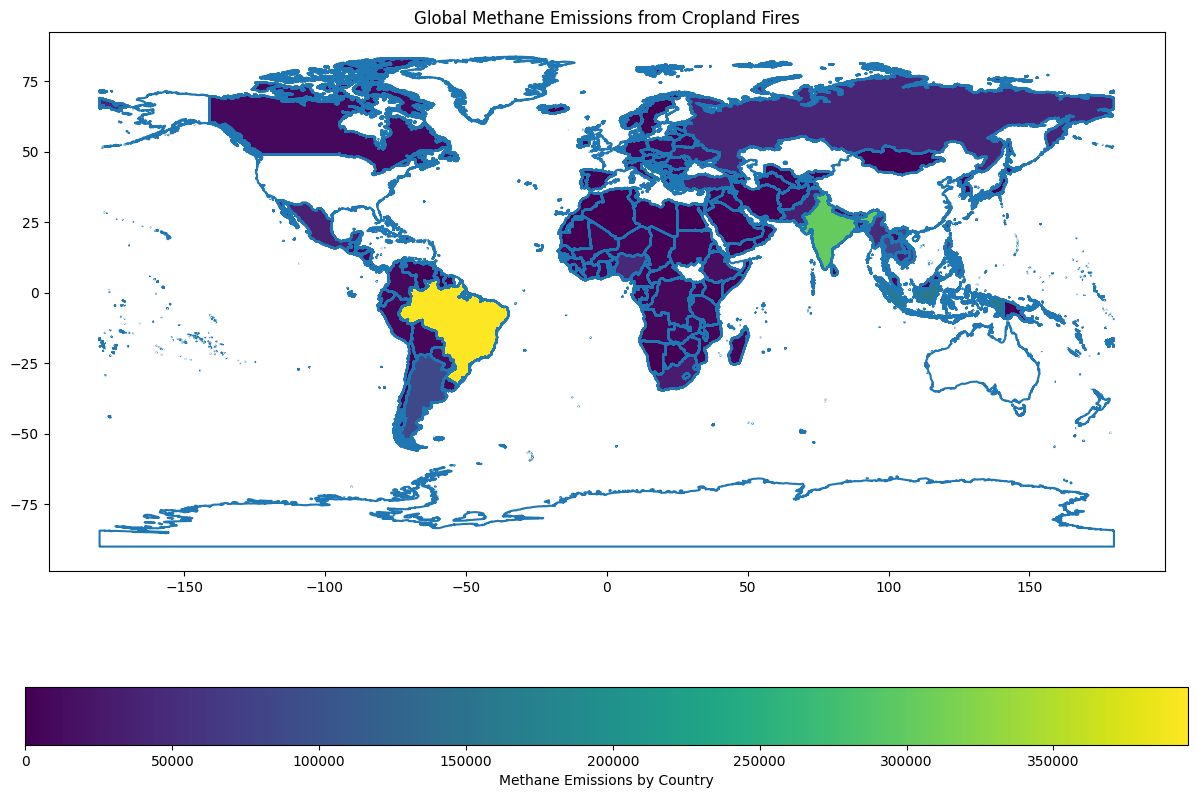

In [51]:
import geopandas as gpd
from matplotlib import pyplot as plt

# # URL to the GeoJSON for the world map
# url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_0_tiny_countries.geojson"

shapefile_path = '/Users/aishsk6/Downloads/ne_10m_admin_0_map_units/ne_10m_admin_0_map_units.shp'

# Load geographic data directly from the URL
world = gpd.read_file(shapefile_path)


# Merge the world map with the methane data
world = world.merge(methane_df, how="left", left_on="SOV_A3", right_on="iso3_country")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='emissions_quantity', ax=ax, legend=True,
           legend_kwds={'label': "Methane Emissions by Country",
                        'orientation': "horizontal"})
plt.title('Global Methane Emissions from Cropland Fires')
plt.show()
